data = https://www.kaggle.com/datasets/jboysen/london-crime 

In [1]:
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
mpl.style.use('fivethirtyeight')


# Reading Data

In [2]:
london_crime = pd.read_csv('data/london_crime_by_lsoa.csv')

In [3]:
london_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
london_crime.shape

(13490604, 7)

In [5]:
london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
# Menghapus kolom lsoa_code
london_crime.drop(['lsoa_code'],axis=1, inplace=True)
london_crime.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [7]:
london_crime.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


# Jumlah Kejahatan Di London berdasarkan Tahun

Total kejatahan berdasarkan Tahun

In [8]:
data_year = pd.DataFrame(
    london_crime.groupby(['year'])['value'].sum()
    )
data_year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [9]:
# Melihat style yang akan kita gunakan

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

> Line Plot

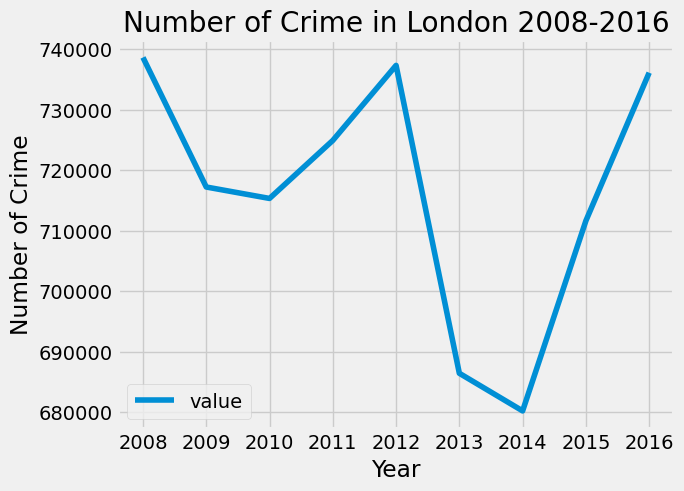

In [10]:
data_year.plot(kind='line')

plt.title('Number of Crime in London 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crime')

plt.show()

> Scatter Plot

In [11]:
data_year.reset_index('year', inplace=True)
data_year

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


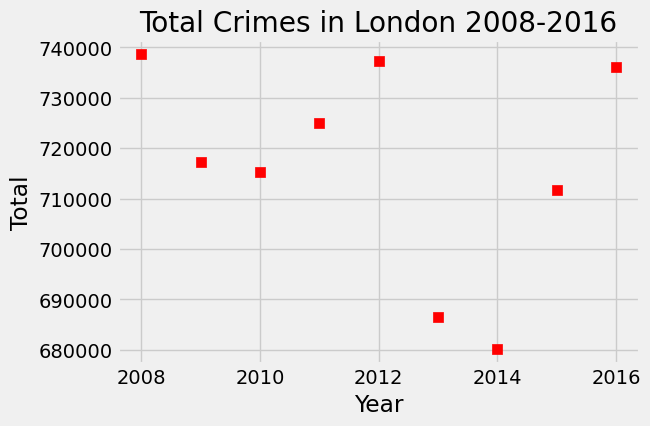

In [12]:
data_year.plot(
    kind='scatter',
    x = 'year',
    y = 'value',
    marker = 's',
    s = 50,
    figsize=(6,4),
    color = 'red'
)

plt.title('Total Crimes in London 2008-2016')
plt.xlabel('Year')
plt.ylabel('Total')

plt.show()

Berdasarkan pada gambar Line dan Scatter Plot diatas, dapat disimpulkan :
 - Total angka kejahatan tertinggi di London berada pada tahun 2008
 - Total angka kejahatan pada tahun 2012 ke tahun 2013 mengalami penurunan drastis
- Total angka kejahatan pada tahun 2014 hingga 2016 terus mengalami kenaikan

# Kategori Kejahatan Tingkat Tinggi di London

In [13]:
# Major_category

major_cat = pd.DataFrame(
    london_crime.groupby('major_category').sum()[['value']])
major_cat.sort_values(by='value', ascending=False, inplace=True)
major_cat

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


> Area Plot

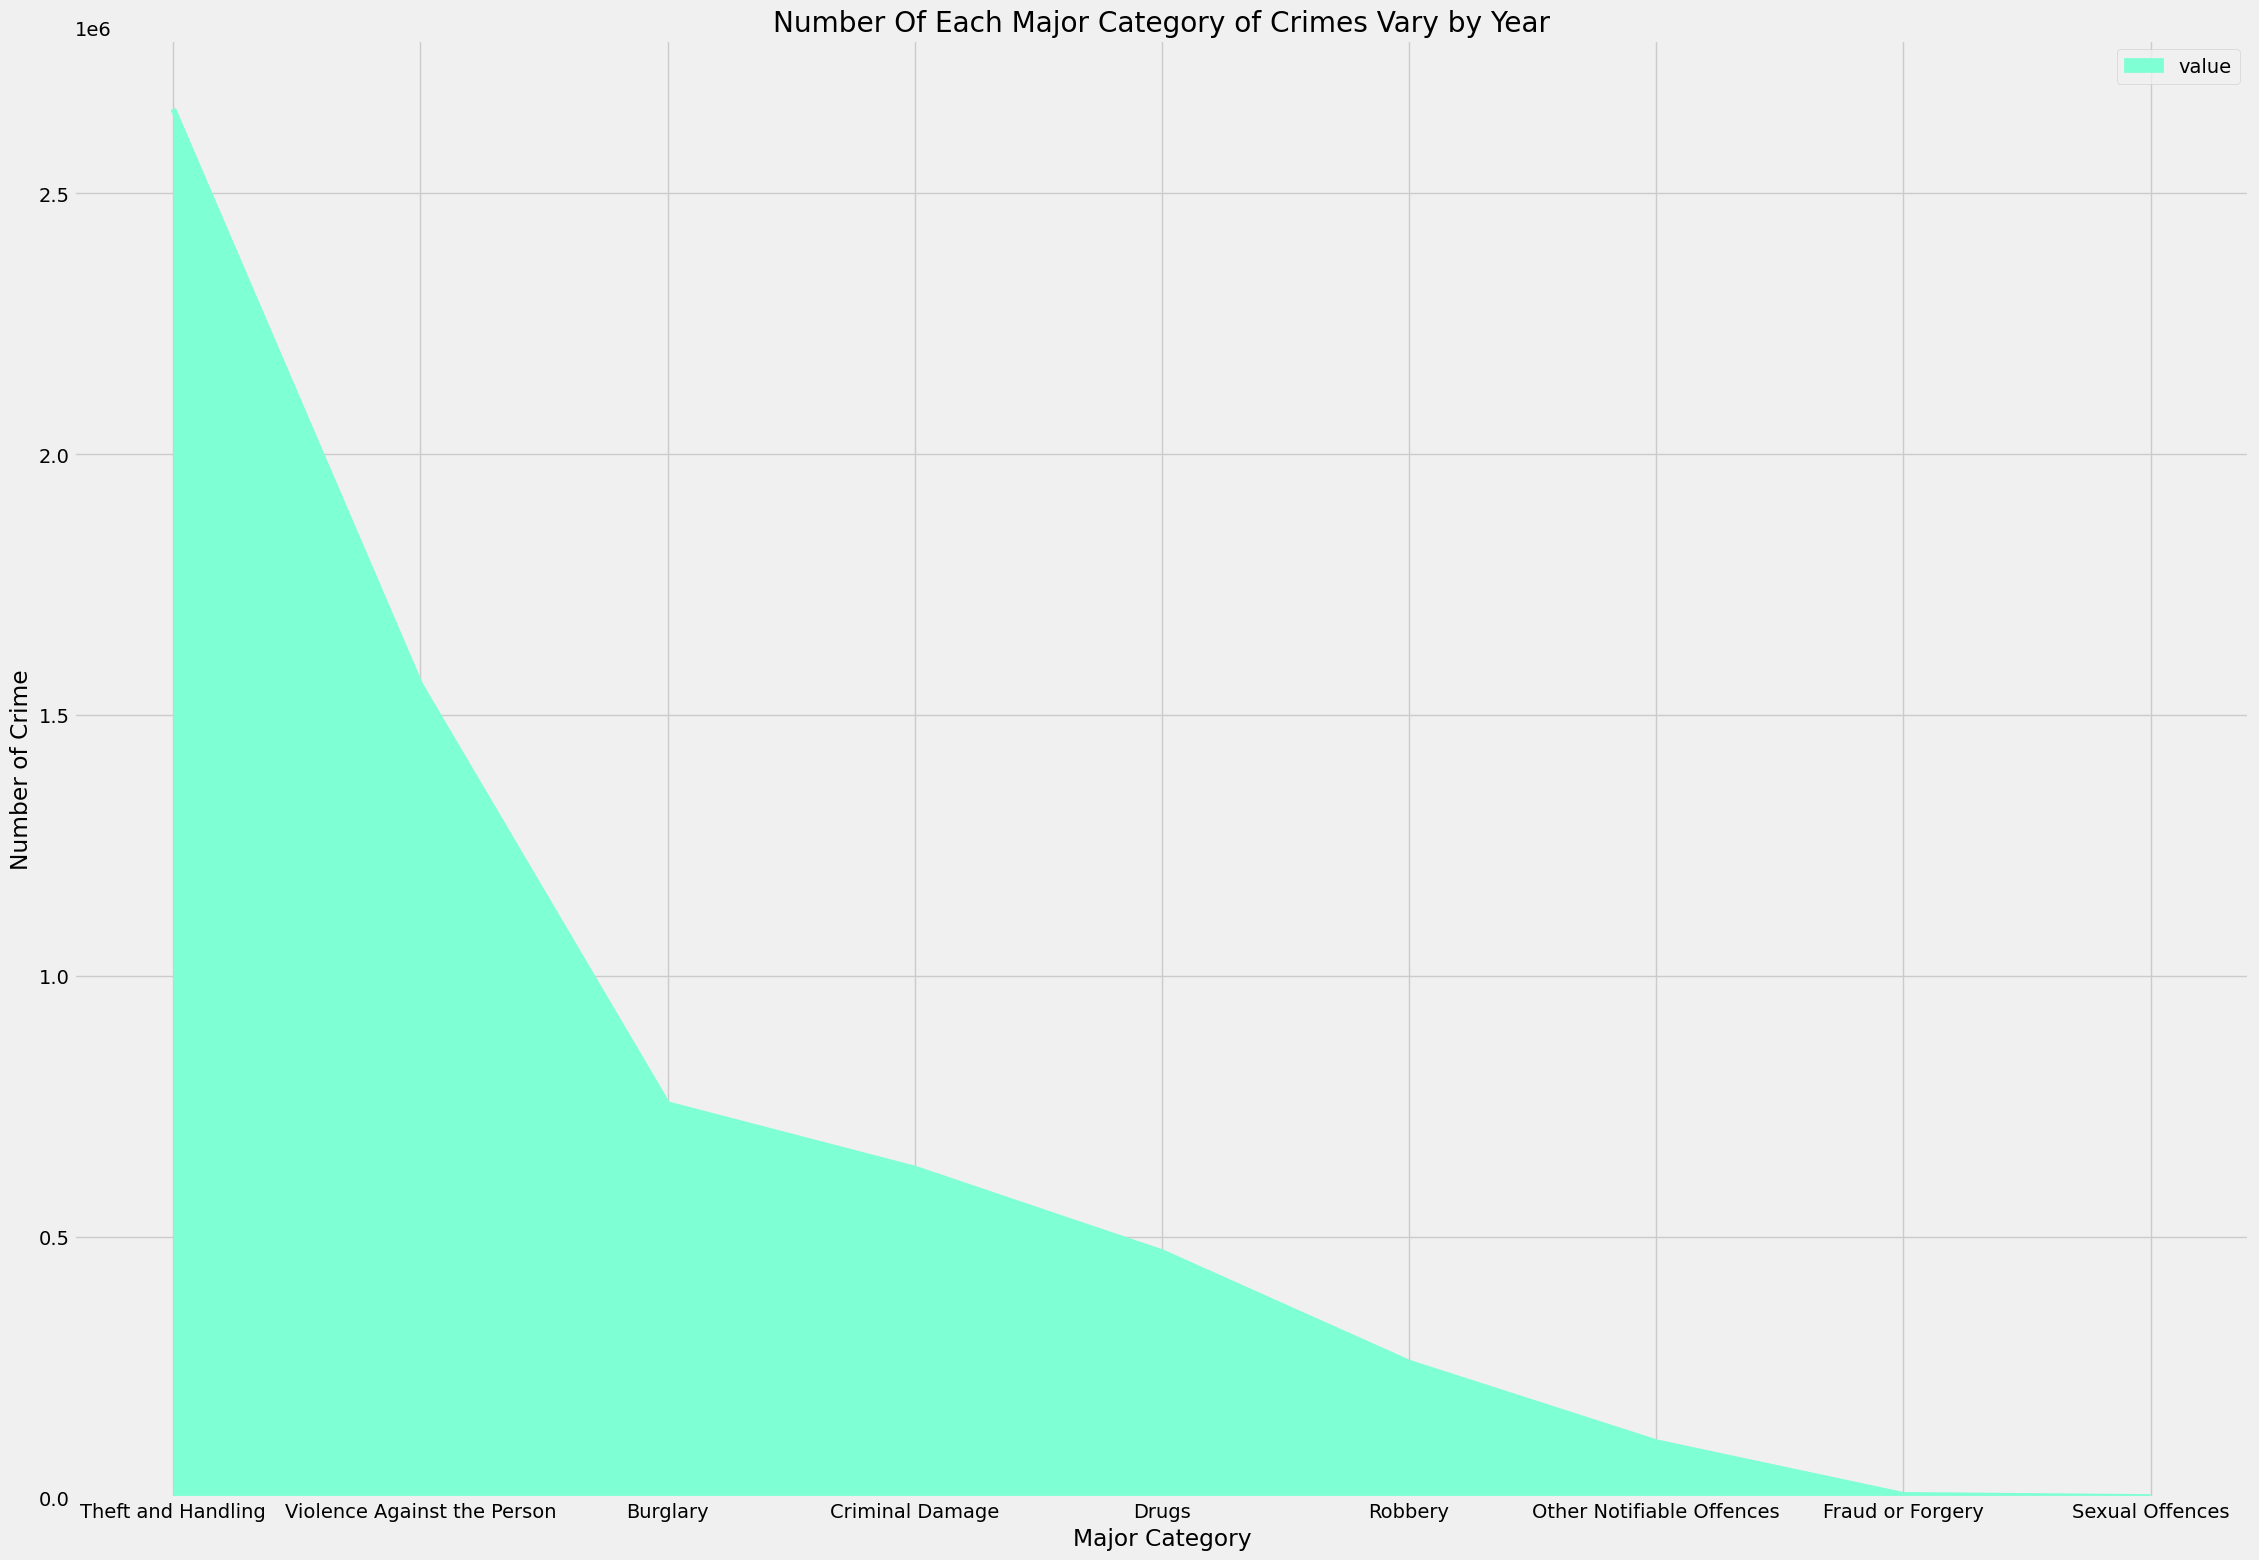

In [14]:
major_cat.plot(
    kind='area',
    figsize=(25,18),
    stacked=True,
    color=('aquamarine')
)

plt.title('Number Of Each Major Category of Crimes Vary by Year')
plt.xlabel('Major Category')
plt.ylabel('Number of Crime')
plt.show()

> Bar Plot

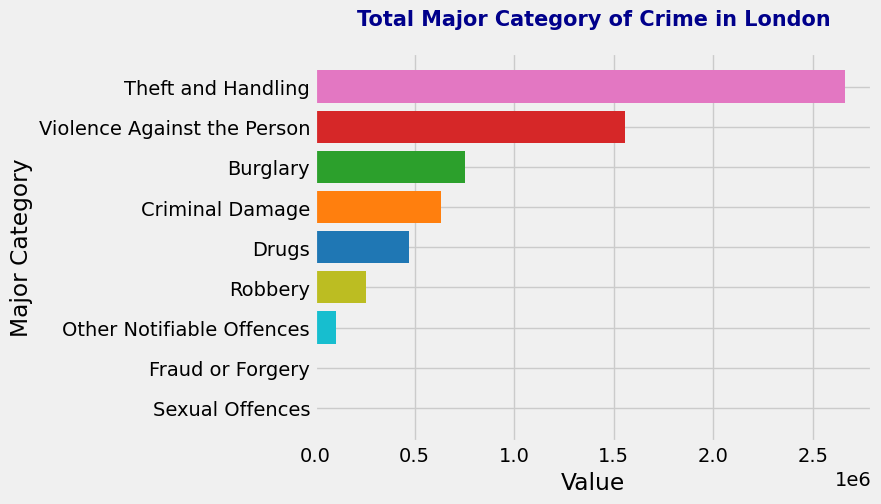

In [15]:

major_cat.sort_values('value', ascending=True, inplace=True)

fig, ax = plt.subplots()

category = major_cat.index
counts = major_cat['value']
bar_colors = ['tab:gray', 'tab:brown', 'tab:cyan', 'tab:olive', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:pink']
font1 = {'color':  'darkblue',
        'weight': 'bold',
        'size': 15}

ax.barh(category, counts, color = bar_colors)
ax.set_title('Total Major Category of Crime in London', y=1.05, fontdict=font1)
ax.set_ylabel('Major Category')
ax.set_xlabel('Value')

plt.show()

Dilihat berdasarkan Area dan Bar Plot diatas, dapat disimpulkan :
- Kategori kejahatan paling banyak di London adalah Theft and Handling
- Kategori kejatahan paling sedikit di London adalah Sexual Offences

# Jumlah Kejahatan Violence Against the Person pada Tahun 2016

In [16]:
major_year_month = pd.DataFrame(
    london_crime.groupby(['year','month'])['value'].sum().unstack().transpose()
)
major_year_month

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,,
1,65419,59142,54934,57966,62436,58933,55515,57055,58847
2,62626,54706,55069,54895,56735,55271,51222,53316,56697
3,61343,63482,63629,61282,67537,57590,57669,60096,59167
4,59640,59181,60085,58714,58801,55678,53467,56445,58637
5,62587,62897,62126,62630,64344,56765,56327,61038,63990
6,62290,63116,62632,61822,62281,56839,57039,60760,62262
7,64126,63281,63764,62428,63280,60508,58564,61606,65519
8,59959,58695,59040,59117,62143,57467,55641,58056,62666
9,58414,57847,59731,58640,56912,54924,56933,57564,61412


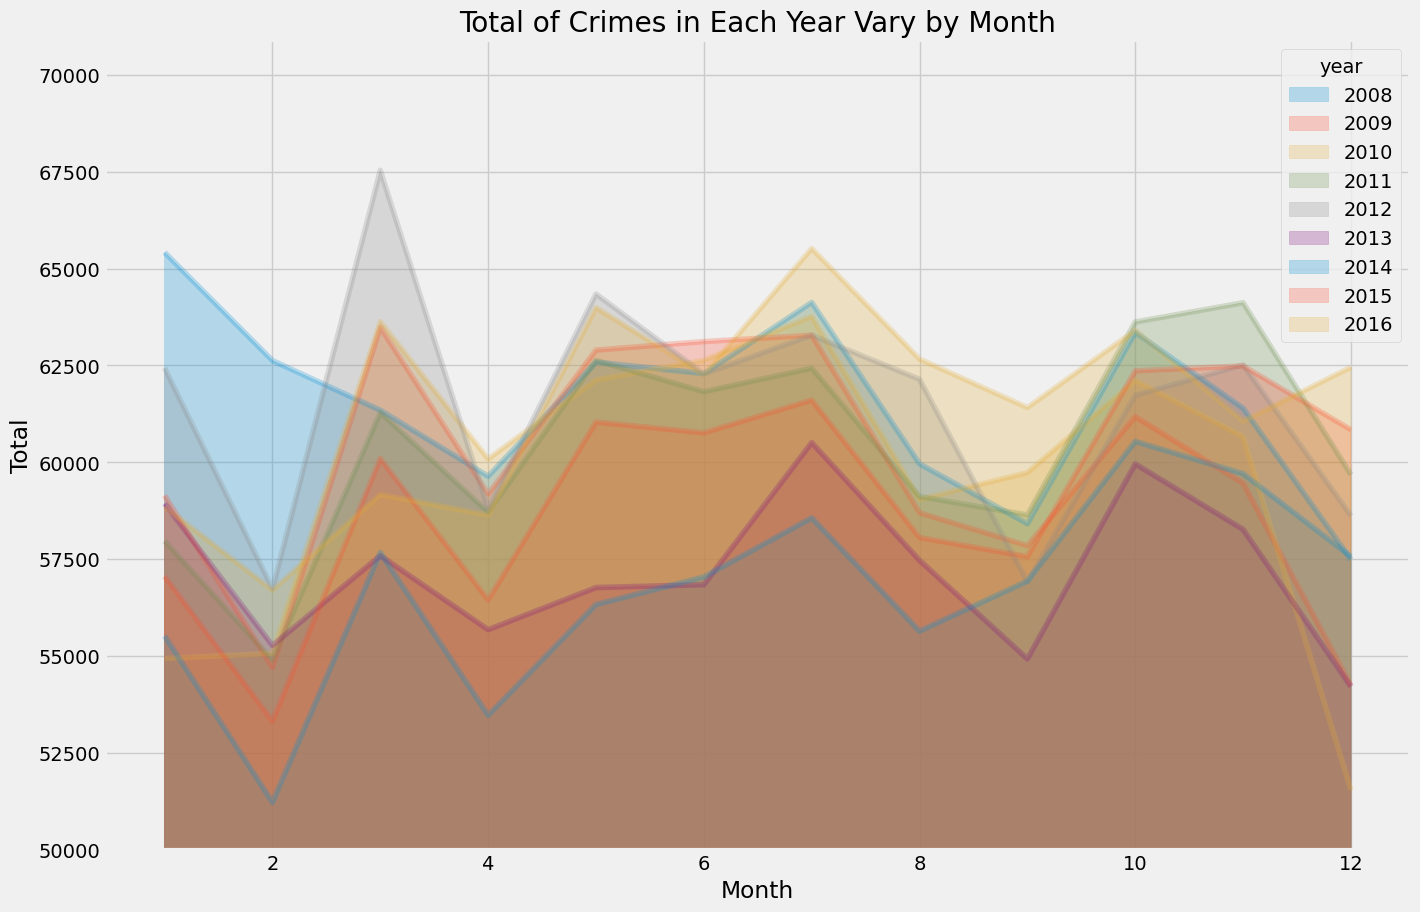

In [17]:
major_year_month.plot(
    kind='area',
    alpha=0.25,
    stacked=False,
    figsize=(15,10)
)
plt.title('Total of Crimes in Each Year Vary by Month')
plt.xlabel('Month')
plt.ylabel('Total')
plt.ylim(bottom=50000)

plt.show()

In [18]:
major1 = london_crime.groupby(['major_category','year', 'month']).agg({'value' : 'sum'})

violenceAgainst_2016 = major1.loc['Violence Against the Person', 2016]
violenceAgainst_2016


,value
month,
1,18266
2,17642
3,18863
4,18668
5,20639
6,20463
7,21733
8,19762
9,19534


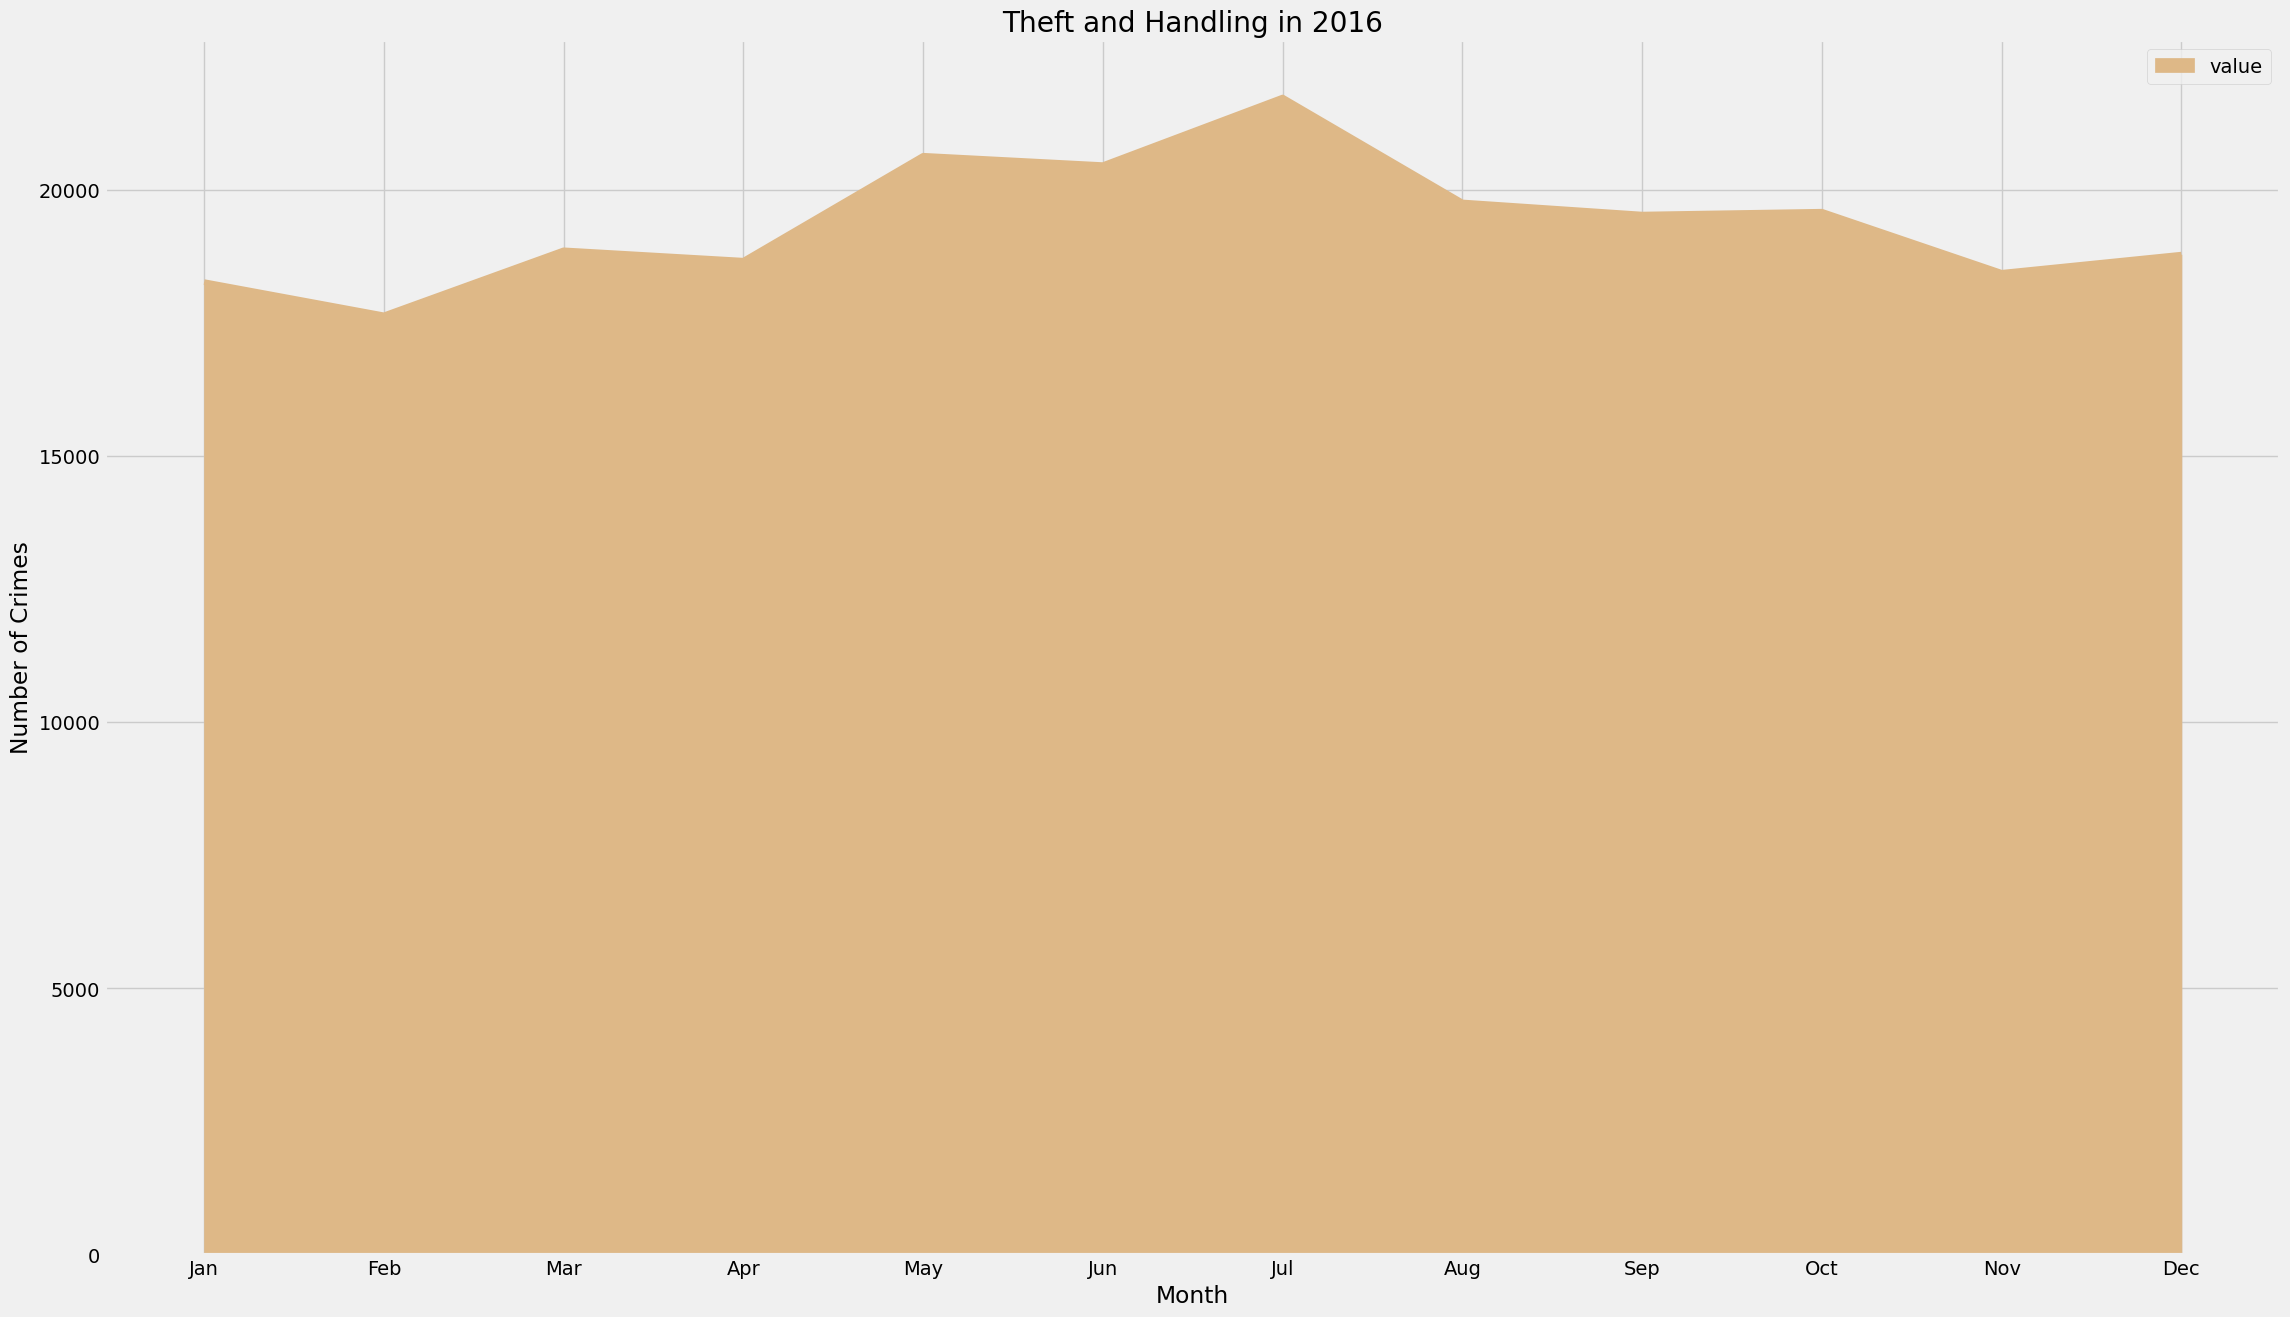

In [19]:
months = range(1, 13)
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

violenceAgainst_2016.plot(kind='area', color='burlywood',stacked=True, figsize=(25,15))

plt.title('Theft and Handling in 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.xticks(months, name_of_months )

plt.show()

Kita ambil contoh untuk Area Plot diatas Violence Against the Person :
- Pada Tahun 2016, jumlah kejahatan tertinggi pada Violence Against the Person berada pada bulan Juli
- Pada Tahun 2016, jumlah kejahatan terendah pada Violence Against the Person berada pada bulan Februari

Kesimpulan yang didapat berdasarkan Area Plot diatas :
- Jumlah Kejatahan berubah dengan pola yang sama setiap tahunnya
- Pada bulan Februari pada awal tahun angka kejahatan menurun
- Pada bulan Maret angka kejahatan naik drastis dan yang paling banyak berada pada tahun 2012

# Melihat TOP3 Kejahatan berdasarkan Major Category di London Tahun 2011 - 2016

In [20]:
major_cat2 = london_crime.groupby(
    ['major_category','year']).agg({'value' : 'sum'}
)
major_cat2.sort_values(by='value', ascending=False, axis=0, inplace=True)
major_cat2.head(20)

value
major_category              year        
Theft and Handling          2012  334054
                            2011  309292
                            2013  306372
                            2016  294133
                            2010  290924
                            2015  284022
                            2008  283692
                            2014  279880
                            2009  279492
Violence Against the Person 2016  232381
                            2015  218740
                            2014  185349
                            2009  160777
                            2008  159844
                            2010  157894
                            2012  150014
                            2011  146901
                            2013  146181
Burglary                    2012   93392
                            2011   93315

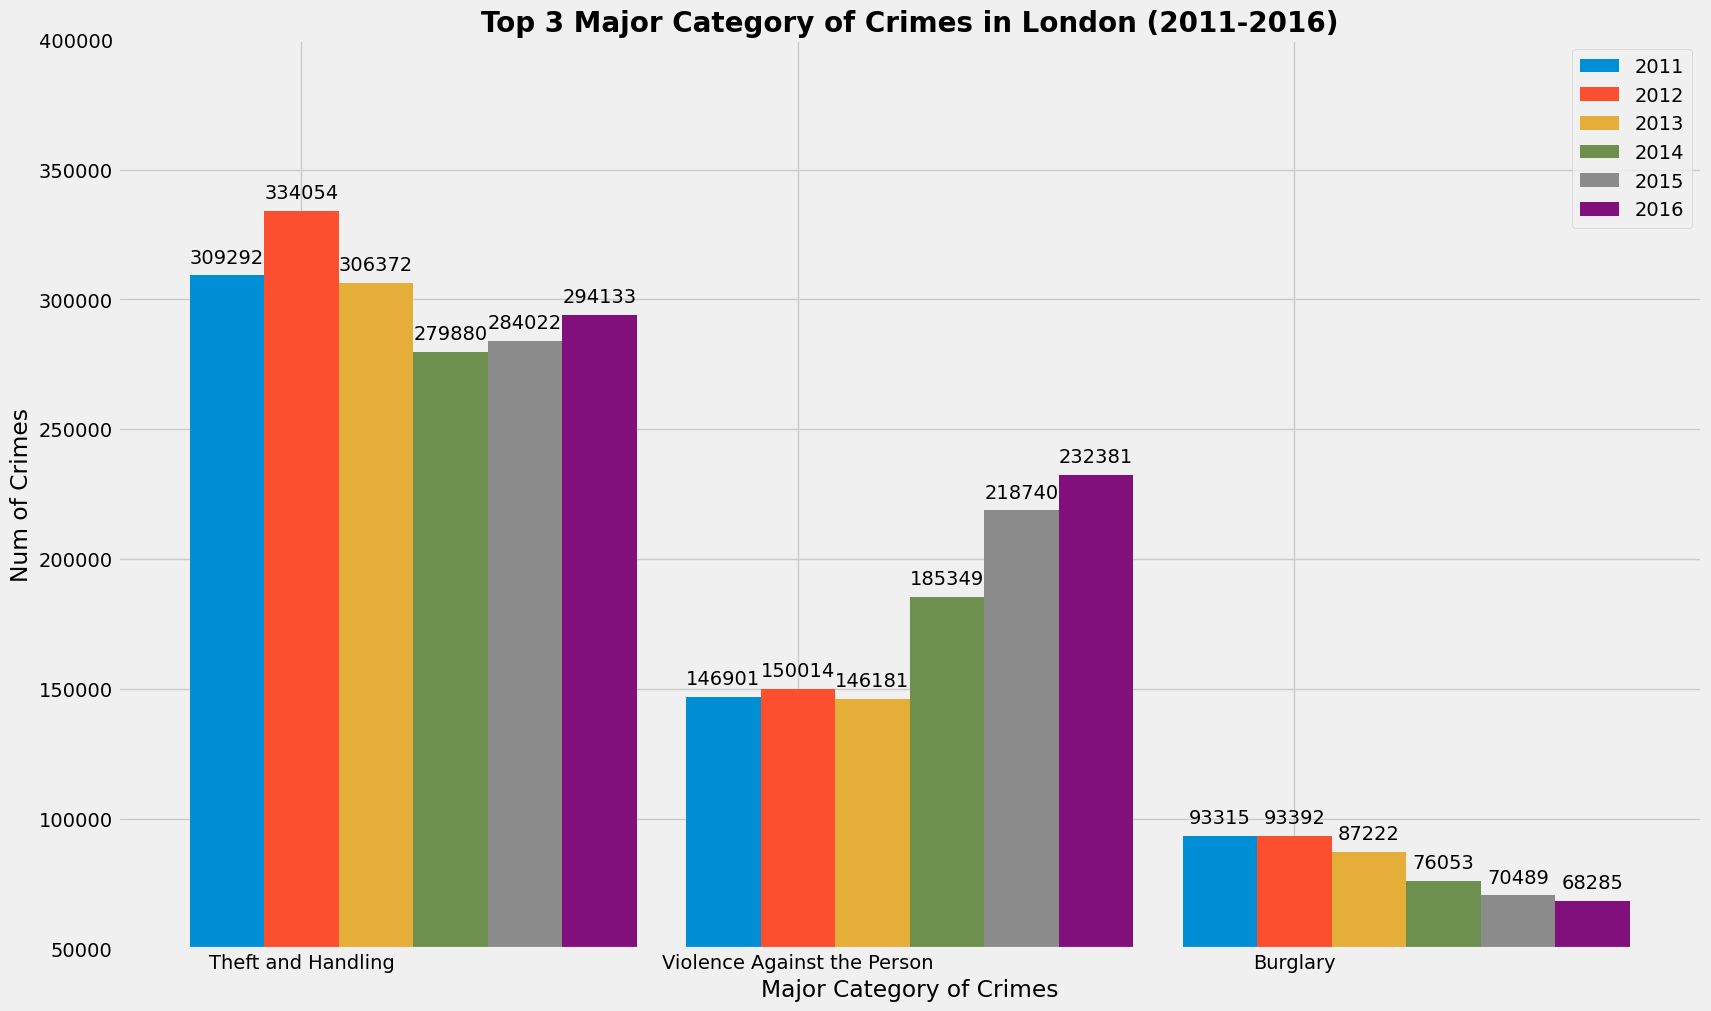

In [21]:
category = ['Theft and Handling', 'Violence Against the Person', 'Burglary']
years = {
    2011 : (309292, 146901, 93315),
    2012 : (334054, 150014, 93392),
    2013 : (306372, 146181, 87222),
    2014 : (279880, 185349, 76053),
    2015 : (284022, 218740, 70489),
    2016 : (294133, 232381, 68285),
}
x = np.arange(len(category))
width= 0.15
multiplier = 0

fig, ax = plt.subplots(layout = 'constrained', figsize = (17,10))

for attribute, measurement in years.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=6)
    multiplier += 1

font2 = {'color':  'black',
        'weight': 'bold',
        'size': 20}
ax.set_ylabel('Num of Crimes')
ax.set_xlabel('Major Category of Crimes')
ax.set_title('Top 3 Major Category of Crimes in London (2011-2016)', fontdict=font2)
ax.set_xticks(x + width, category)
ax.legend(loc='upper right')
ax.set_ylim(50000, 400000)


plt.show()

Dilihat dari Bar Plot diatas dapat disimpulkan :
- Dari tahun 2011-2016, tipe kejahatan dari Theft and Handling merupakan kejahatan tertinggi yang terdapat pada tahun 2012 dan yang terendah berada pada tahun 2014
- Dari tahun 2011-2016, tipe kejahatan dari Violence Against the Person yang tertinggi berada pada tahun 2016 dan yang terendah berada pada tahun 2013
- Dan yang terakhir dari tahun 2011-2016, tipe kejahatan dari Burglary yang tertinggi berada pada tahun 2012 dan yang terendah berapad pada tahun 2016

# Distribusi Frekeuensi Jumlah Kriminalitas Wilayah London Setiap Tahunnya

In [22]:
borough_year= pd.DataFrame(
    london_crime.groupby(['borough','year'])['value'].sum().unstack()
)
borough_year.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


In [23]:
count, bin_edges = np.histogram( borough_year)

print(count)
print(bin_edges)

[  9  30  43 101  75  30   0   0   6   3]
[    0.   5922.6 11845.2 17767.8 23690.4 29613.  35535.6 41458.2 47380.8
 53303.4 59226. ]


> Histogram

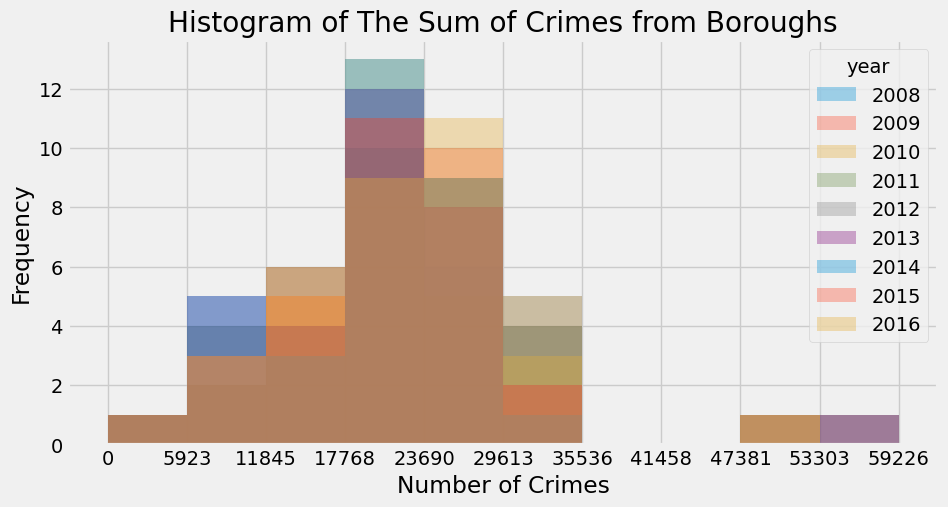

In [24]:
borough_year.plot(
    kind='hist',
    figsize=(10,5),
    alpha=0.35,
    xticks=bin_edges,
    # color = ['pink', 'skyblue','lawngreen']
)

plt.title('Histogram of The Sum of Crimes from Boroughs')
plt.ylabel('Frequency')
plt.xlabel('Number of Crimes')
plt.show()

Secara keseluruhan setiap tahun beberapa wilayah mencatat jumlah kriminalitas pada range 0-35536, tetapi tidak ada daerah yang mencatat jumlah kriminalitas pada range 35536-47381 dan mulai mencatat kembali pada range 47381-59226

# Perbandingan Tren Jumlah Kriminalitas 5 Wilayah di London yang memiliki Jumlah Kriminalitas Paling Tinggi

In [32]:
borough = pd.DataFrame(
    london_crime.groupby('borough')['value'].sum()
)
borough

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


Setelah mendapatkan data tersebut kemudian urutkan data berdasarkan values dengan menggunakan sort_values(). Lalu membuat nilai ascending menjadi False agar data diurutkan berdasarkan data/kasus yang paling banyak ke data paling sedikit. Terakhir gunakan head() untuk menampilkan TOP5 data tersebut

In [36]:
borough_top5 = borough.sort_values(['value'],ascending=False).head()

borough_top5

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


In [42]:
data_borough_year_top5 = borough_year.transpose()[borough_top5.index]
data_borough_year_top5

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


In [45]:
data_borough_year_top5.describe()

borough,Westminster,Lambeth,Southwark,Camden,Newham
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,50558.666667,32464.222222,30978.777778,30571.888889,29113.777778
std,4201.683918,1014.515005,1215.293049,2121.547633,1119.162385
min,47395.000000,31225.000000,28912.000000,27198.000000,27577.000000
25%,47846.000000,31717.000000,30623.000000,29183.000000,28005.000000
50%,48330.000000,31868.000000,30737.000000,31472.000000,29217.000000
75%,53852.000000,33224.000000,31320.000000,31804.000000,30067.000000
max,59226.000000,34071.000000,33470.000000,33956.000000,30728.000000


> Box Plot

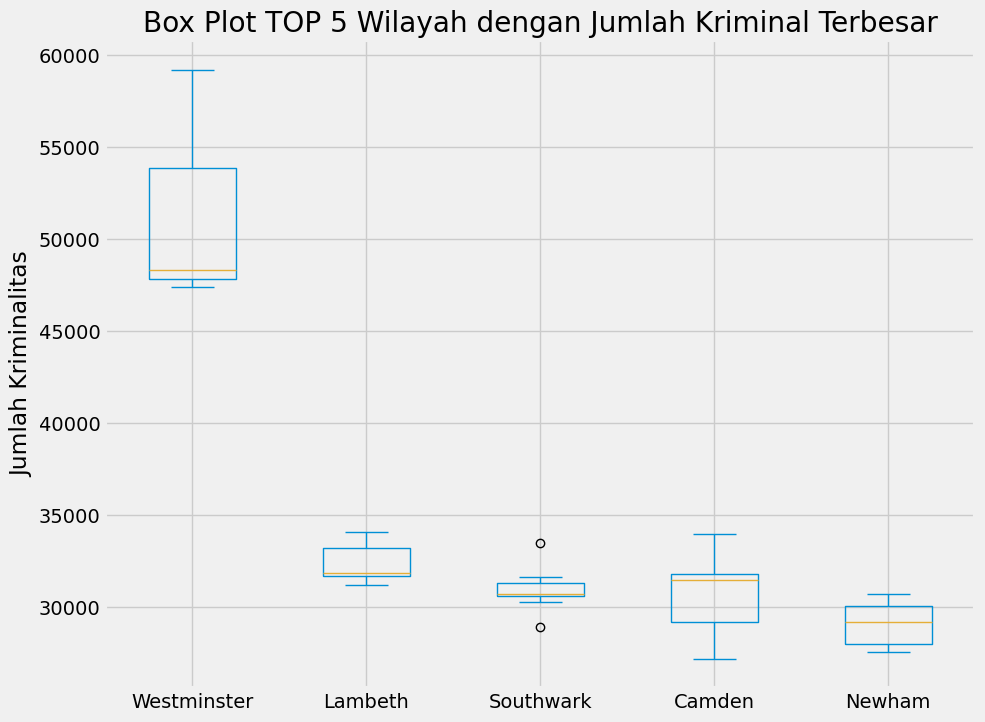

In [43]:
data_borough_year_top5.plot(
    kind='box',
    figsize=(10,8)
)
plt.title('Box Plot TOP 5 Wilayah dengan Jumlah Kriminal Terbesar')
plt.ylabel('Jumlah Kriminalitas')

plt.show()

Dapat dilihat untuk wilayah Westminster memiliki rata-rata jumlah kriminalitas paling tinggi yaitu 50000-51000. Sangat berbeda dengan Wilayah-wilayah lain yang memiliki rata-rata yang hampir sama, yaitu berkisar 29000-33000. Ini juga menunjukkan untuk Wilayah Westminster memilikir jumlah tren kriminalitas berbeda dengan wilayah lain seoerti Lambeth, Southwark, Camden dan Newham yang memiliki tren jumlah kriminalitas yang hampir sama.

In [46]:
minor_data = london_crime.groupby('minor_category').sum()
minor_data.sort_values(by='value', ascending=False, inplace=True)
minor_data

,value,year,month
minor_category,,,
Other Theft,980085,1050626160,3394170
Theft From Motor Vehicle,569956,1050626160,3394170
Burglary in a Dwelling,491282,1049322384,3389958
Harassment,458124,1050408864,3393468
Assault with Injury,451001,1049974272,3392064
Possession Of Drugs,431948,1049756976,3391362
Common Assault,413690,1050626160,3394170
Theft From Shops,345142,838545264,2709018
Other Theft Person,308842,1045193760,3376620


In [47]:
minor_top10 = minor_data['value'].head(10)
minor_top10

minor_category
Other Theft                         980085
Theft From Motor Vehicle            569956
Burglary in a Dwelling              491282
Harassment                          458124
Assault with Injury                 451001
Possession Of Drugs                 431948
Common Assault                      413690
Theft From Shops                    345142
Other Theft Person                  308842
Criminal Damage To Motor Vehicle    265463
Name: value, dtype: int64

Text(0.5, 1.15, "Percentage of Crimes in Top 10 London's Minor Category")

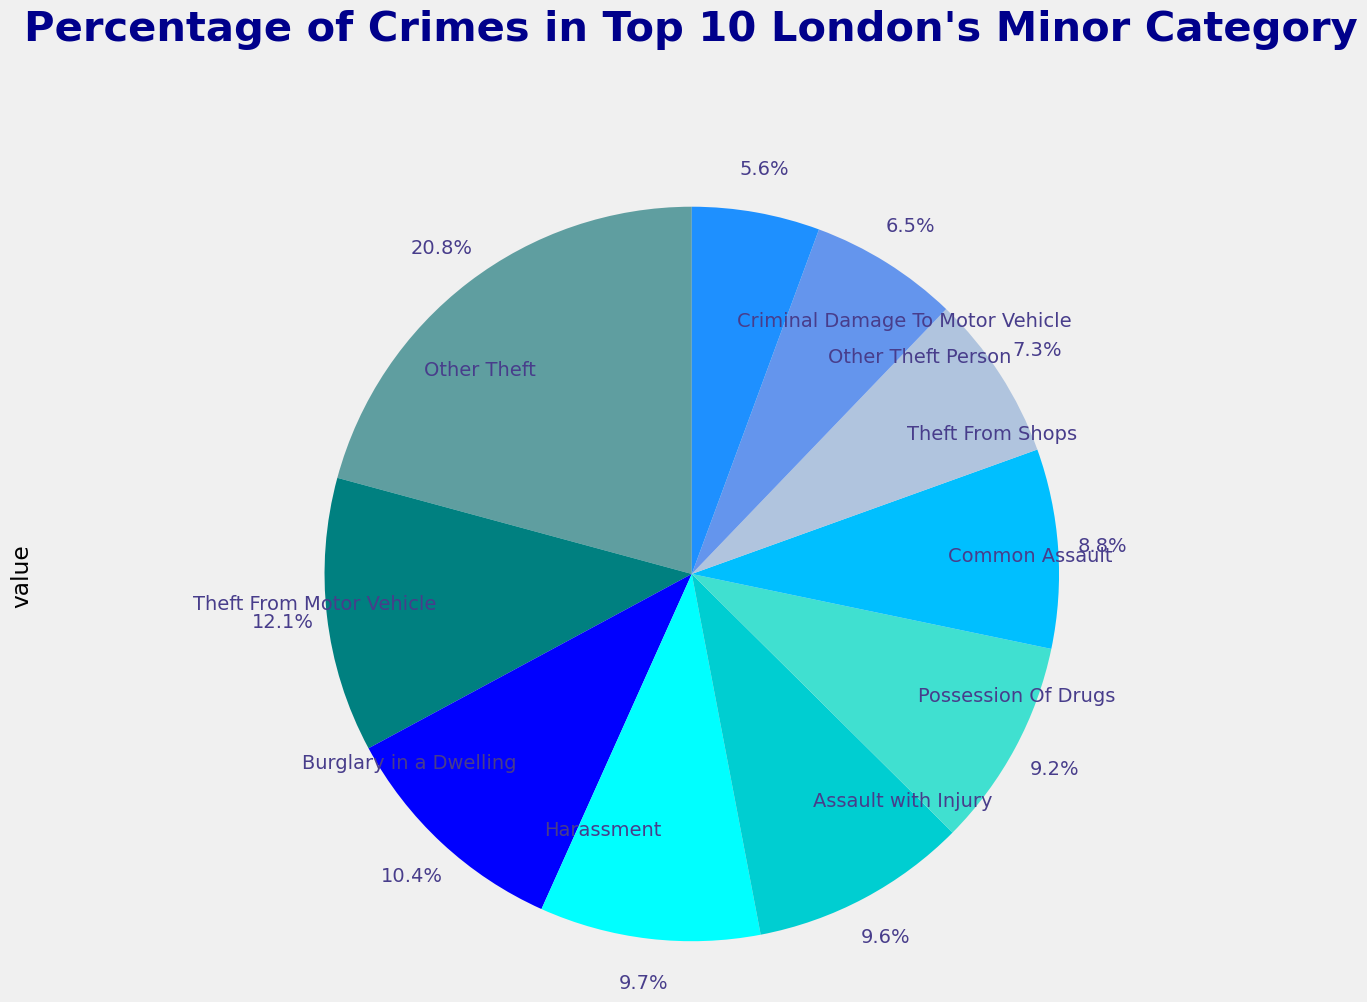

In [48]:
font1 = {'color':  'darkblue',
        'weight': 'bold',
        'size': 30,
        }
lable=minor_top10.index
ax = plt.axes()
ax.set_facecolor("lightblue")
minor_top10.plot(
    kind='pie',
    figsize=(15,10),
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=False,
    pctdistance=1.12,
    labels = lable,
    labeldistance = 0.7,
    colors = ['cadetblue', 'teal', 'blue', 'cyan', 'darkturquoise','turquoise', 'deepskyblue','lightsteelblue','cornflowerblue','dodgerblue'],
    textprops={'fontsize': 14,'color':'darkslateblue'})

plt.axis('equal')
plt.title("Percentage of Crimes in Top 10 London's Minor Category", y=1.15, fontdict=font1)


Berdasarkan Pie Chart diatas dapat disimpulkan :
Othe Theft merupakan Minor Category dengan presentase tertinggi

> Word Cloud

In [51]:
borough

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [54]:
borough

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [55]:
total_crimes = borough['value'].sum()
total_crimes

6447758

In [59]:
listToStr = ' '.join([str(elem) for elem in london_crime[london_crime['minor_category'] == 'Rape'].borough.values])

In [60]:
stopwords = set(STOPWORDS)

In [61]:
borough_wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords
)
borough_wordcloud.generate(listToStr)

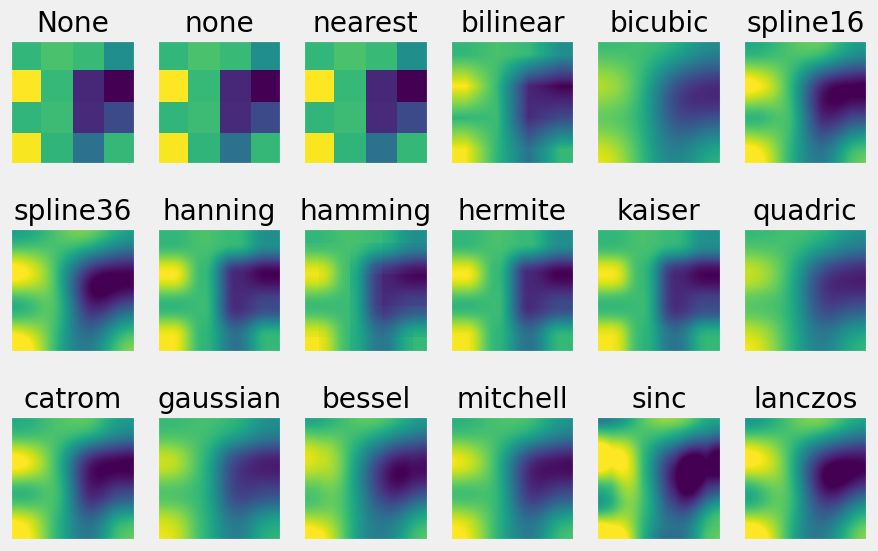

In [62]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
np.random.seed(19680801)

grid = np.random.rand(4,4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9,6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()

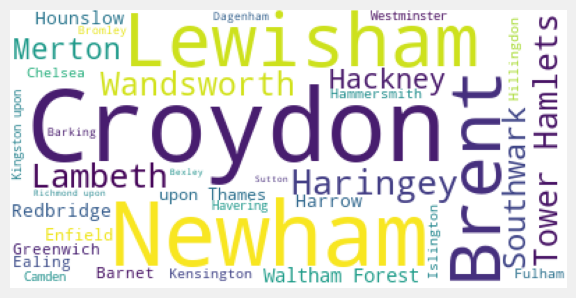

In [66]:
plt.imshow(borough_wordcloud, interpolation='kaiser')
plt.axis('off')
plt.show()

Berdasarkan WordCloud diatas kejahatan Rape yang paling sering muncul berada di wilayah Croydon

> Folium

In [69]:
latitude = 51.509865
longitude= -0.118092
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)
london_map

# Kesimpulan

- Total angka kejahatan dari tahun 2008-2016 bersifat fluktuatif. Namun, dari mulai tahun 2015 mengalami kenaikan
- Theft and Handling merupakan kejahatan tingkat tinggi yang paling sering terjadi di London, sedangkan Sexual Offences yang paling jarang terjadi di London
- Westminster adalah wilayah di London yang memiliki tingkat kejahatan tertinggi, sehingga wilayah ini dapat dikatakan sebagai wilayah yag paling berbaya. Sedangkan, City of London adalah wilayah yang paling aman dengan jumlah angka kejahatan terendah di London